# Behavorial Analysis

In this notebook we document the analysis of behavorial response data across studies.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import glob
import numpy as np
import os

***

# Load and Process Data

In [2]:
cond_order = ['care_physical', 'care_emotional', 'fairness', 'liberty', 'loyalty', 'authority', 'sanctity', 'social_norms']
nimf2_order = ['care_physical', 'care_emotional', 'fairness', 'loyalty', 'authority', 'sanctity', 'family',  'reciprocity', 'property','heroism', 'group', 'deference', 'social_norms']

## Discovery Cohort

In [3]:
nimf1_dir = '/srv/lab/fmri/mofomic/ucsb_1'

nimf1_beh_files = glob.glob(os.path.join(nimf1_dir, 'sub-*/beh/sub-*_task-mfv_*_beh.tsv'))
vig_beh_dfs = []
for file in nimf1_beh_files:
    df = pd.read_csv(file, sep='\t')
    df['run'] = int(file.split('/')[-1].split('-')[-1].split('_')[0])
    vig_beh_dfs.append(df)
nimf1_beh = pd.concat(vig_beh_dfs).reset_index(drop=True)
nimf1_beh_items = nimf1_beh.groupby(['cond_id','trial_type'])[['moral_decision','RT']].mean().reset_index()

print('Unique number of subjects in discovery cohort:', nimf1_beh['sub_id'].nunique())
print('Unique number of vignettes in discovery cohort:', nimf1_beh['cond_id'].nunique())

Unique number of subjects in discovery cohort: 64
Unique number of vignettes in discovery cohort: 120


## Validation Cohort

In [4]:
nimf2_dir = '/srv/lab/fmri/mofomic/ucsb_2'

nimf2_beh_files = glob.glob(os.path.join(nimf2_dir, 'sub-*/beh/sub-*_task-mfv_*_beh.tsv'))
vig_beh_dfs = []
for file in nimf2_beh_files:
    df = pd.read_csv(file, sep='\t')
    df['run'] = int(file.split('/')[-1].split('-')[-1].split('_')[0])
    vig_beh_dfs.append(df)
nimf2_beh = pd.concat(vig_beh_dfs).reset_index(drop=True)
nimf2_beh_items = nimf2_beh.groupby(['cond_id','trial_type'])[['moral_decision','RT']].mean().reset_index()

print('Unique number of subjects in discovery cohort:', nimf2_beh['sub_id'].nunique())
print('Unique number of vignettes in discovery cohort:', nimf2_beh['cond_id'].nunique())

Unique number of subjects in discovery cohort: 31
Unique number of vignettes in discovery cohort: 72


## Replication Cohort

In [5]:
nimf3_dir = '/srv/lab/fmri/mofomic/duke'

nimf3_beh_files = glob.glob(os.path.join(nimf3_dir, 'sub-*/beh/sub-*_task-mfv_*_beh.tsv'))
vig_beh_dfs = []
for file in nimf3_beh_files:
    df = pd.read_csv(file, sep='\t')
    df['run'] = int(file.split('/')[-1].split('-')[-1].split('_')[0])
    vig_beh_dfs.append(df)
nimf3_beh = pd.concat(vig_beh_dfs).reset_index(drop=True)
nimf3_beh_items = nimf3_beh.groupby(['cond_id','trial_type'])[['moral_decision','RT']].mean().reset_index()

print('Unique number of subjects in discovery cohort:', nimf3_beh['sub_id'].nunique())
print('Unique number of vignettes in discovery cohort:', nimf3_beh['cond_id'].nunique())

Unique number of subjects in discovery cohort: 27
Unique number of vignettes in discovery cohort: 120


## Generalization Cohort

In [6]:
nimf4_dir = '/srv/lab/fmri/mofomic/uva'

nimf4_beh_files = glob.glob(os.path.join(nimf4_dir, 'sub-*/beh/sub-*_task-mfv_*_beh.tsv'))
vig_beh_dfs = []
for file in nimf4_beh_files:
    df = pd.read_csv(file, sep='\t')
    df['run'] = int(file.split('/')[-1].split('-')[-1].split('_')[0])
    vig_beh_dfs.append(df)
nimf4_beh = pd.concat(vig_beh_dfs).reset_index(drop=True)
nimf4_beh_items = nimf4_beh.groupby(['cond_id','trial_type'])[['moral_decision','RT']].mean().reset_index()

print('Unique number of subjects in discovery cohort:', nimf4_beh['sub_id'].nunique())
print('Unique number of vignettes in discovery cohort:', nimf4_beh['cond_id'].nunique())

Unique number of subjects in discovery cohort: 30
Unique number of vignettes in discovery cohort: 120


***
# Visualizations (SI Figure 1)

In [7]:
sns.set_context('paper', font_scale=1.5)
sns.set_style('ticks')

## Ratings per run


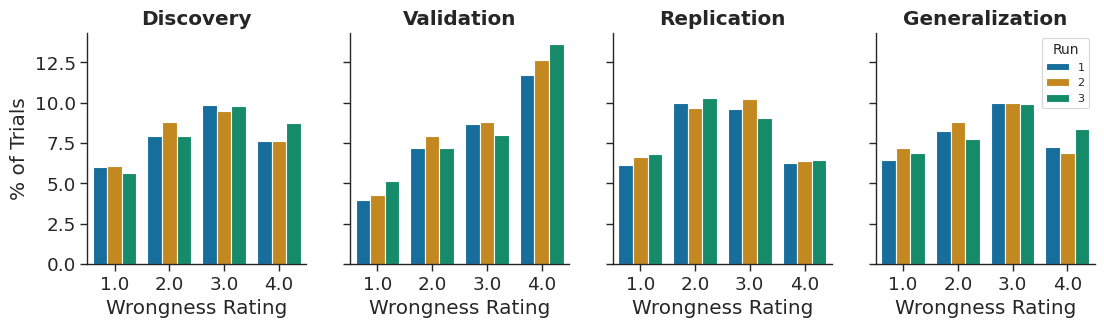

In [8]:
f, ax = plt.subplots(1,4, figsize=(13, 3), sharey=True)

sns.countplot(x='moral_decision', hue='run', data=nimf1_beh, palette="colorblind", ax=ax[0], stat='percent')
sns.countplot(x='moral_decision', hue='run', data=nimf2_beh, palette="colorblind", ax=ax[1], stat='percent')
sns.countplot(x='moral_decision', hue='run', data=nimf3_beh, palette="colorblind", ax=ax[2], stat='percent')
sns.countplot(x='moral_decision', hue='run', data=nimf4_beh, palette="colorblind", ax=ax[3], stat='percent')


sns.despine()

ax[0].set_title("Discovery", weight='bold')
ax[1].set_title("Validation", weight='bold')
ax[2].set_title("Replication", weight='bold')
ax[3].set_title("Generalization", weight='bold')

ax[0].set(ylabel="% of Trials")
ax[0].set(xlabel="Wrongness Rating")
ax[1].set(xlabel="Wrongness Rating")
ax[2].set(xlabel="Wrongness Rating")
ax[3].set(xlabel="Wrongness Rating")
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()
ax[3].legend(loc='upper right', ncol=1, title='Run', fontsize=8, title_fontsize=10)
plt.savefig('/srv/lab/fmri/mft/fhopp_diss/analysis/signature/plots/ratings_runs.png', dpi=300, bbox_inches='tight')
plt.show()


## Ratings per Category

In [9]:
mf_pal1 = sns.color_palette("colorblind",7)[0:3]
mf_pal2 = sns.color_palette("colorblind",7)[4:]
mac_pal = sns.color_palette("Pastel1", 6)
socn = sns.color_palette("colorblind",8)[-1]

valid_pal = mf_pal1+mf_pal2+mac_pal+[socn]

/tmp/ipykernel_364694/2651555439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_364694/2651555439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(nimf1_beh_items, y="moral_decision", x="trial_type",
/tmp/ipykernel_364694/2651555439.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_364694/2651555439.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.strip

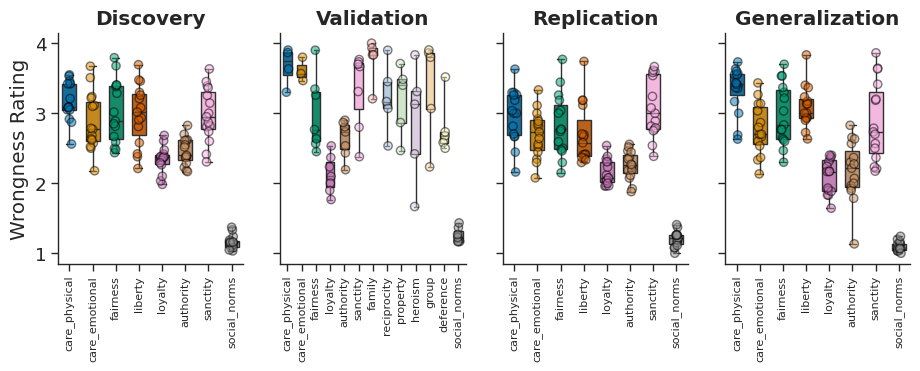

In [10]:
f, ax = plt.subplots(1,4, figsize=(11, 3), sharey=True, sharex=False)

sns.boxplot(
    nimf1_beh_items, y="moral_decision", x="trial_type", 
    whis=[0, 100], width=.6, palette="colorblind", order=cond_order, ax=ax[0]
)

# Add in points to show each observation
sns.stripplot(nimf1_beh_items, y="moral_decision", x="trial_type",  
              order=cond_order, hue_order=cond_order,legend=False,
              palette="colorblind", edgecolor='black', linewidth=1, alpha=.5, 
              size=6, ax=ax[0])

sns.boxplot(
    nimf2_beh_items, y="moral_decision", x="trial_type",  
    whis=[0, 100], width=.6, palette=valid_pal, order=nimf2_order, ax=ax[1]
)

# Add in points to show each observation
sns.stripplot(nimf2_beh_items, y="moral_decision", x="trial_type", 
              order=nimf2_order, hue_order=nimf2_order,legend=False,
              palette=valid_pal, edgecolor='black', linewidth=1, alpha=.5, 
              size=6, ax=ax[1]) 

sns.boxplot(
    nimf3_beh_items, y="moral_decision", x="trial_type", 
    whis=[0, 100], width=.6, palette="colorblind", order=cond_order, ax=ax[2]
)

# Add in points to show each observation
sns.stripplot(nimf3_beh_items, y="moral_decision", x="trial_type", 
              order=cond_order, hue_order=cond_order,legend=False,
              palette="colorblind", edgecolor='black', linewidth=1, alpha=.5, 
              size=6, ax=ax[2])

sns.boxplot(
    nimf4_beh_items, y="moral_decision", x="trial_type", 
    whis=[0, 100], width=.6, palette="colorblind", order=cond_order, ax=ax[3]
)

# Add in points to show each observation
sns.stripplot(nimf4_beh_items, y="moral_decision",x="trial_type", 
              order=cond_order, hue_order=cond_order,legend=False,
              palette="colorblind", edgecolor='black', linewidth=1, alpha=.5, 
              size=6, ax=ax[3]) 

# # Create title and make it bold
ax[0].set_title("Discovery", weight='bold')
ax[1].set_title("Validation", weight='bold')
ax[2].set_title("Replication", weight='bold')
ax[3].set_title("Generalization", weight='bold')

# # Tweak the visual presentation
ax[0].set(ylabel="Wrongness Rating")

ax[0].set(xlabel="")
ax[1].set(xlabel="")
ax[2].set(xlabel="")
ax[3].set(xlabel="")
sns.despine()

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=90, fontsize=8)

plt.savefig('/srv/lab/fmri/mft/fhopp_diss/analysis/signature/plots/ratings_conditions.png', dpi=300, bbox_inches='tight')
plt.show()

***

In [11]:
# Did every participant make use of all 4 rating options across all vignettes?
mj_range_s1 = nimf1_beh.groupby("sub_id")['moral_decision'].unique().apply(lambda x: max(x)-min(x))
mj_range_s1.describe()

count    53.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: moral_decision, dtype: float64

In [12]:
mj_range_s2 = nimf2_beh.groupby("sub_id")['moral_decision'].unique().apply(lambda x: max(x)-min(x))
mj_range_s2.describe()

count    31.000000
mean      2.967742
std       0.179605
min       2.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: moral_decision, dtype: float64

In [13]:
mj_range_s3 = nimf3_beh.groupby("sub_id")['moral_decision'].unique().apply(lambda x: max(x)-min(x))
mj_range_s3.describe()

count    24.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: moral_decision, dtype: float64

In [14]:
mj_range_s4 = nimf4_beh.groupby("sub_id")['moral_decision'].unique().apply(lambda x: max(x)-min(x))
mj_range_s4.describe()

count    26.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: moral_decision, dtype: float64

In [15]:
nimf1_beh.groupby(['trial_type'])['moral_decision'].value_counts(normalize=True).unstack().reset_index().round(2)

moral_decision,trial_type,1.0,2.0,3.0,4.0
0,authority,0.10,0.43,0.38,0.09
1,care_emotional,0.05,0.29,0.37,0.28
2,care_physical,0.04,0.18,0.33,0.45
3,fairness,0.04,0.24,0.39,0.33
4,liberty,0.05,0.24,0.38,0.33
5,loyalty,0.20,0.38,0.30,0.12
6,sanctity,0.09,0.23,0.28,0.40
7,social_norms,0.88,0.08,0.02,0.01


In [16]:
nimf2_beh.groupby(['trial_type'])['moral_decision'].value_counts(normalize=True).unstack().reset_index().round(2)

moral_decision,trial_type,1.0,2.0,3.0,4.0
0,authority,0.06,0.39,0.41,0.14
1,care_emotional,0.02,0.06,0.21,0.71
2,care_physical,0.01,0.07,0.15,0.77
3,deference,0.05,0.32,0.43,0.21
4,fairness,0.05,0.26,0.35,0.34
5,family,NaN,0.05,0.14,0.81
6,group,0.03,0.14,0.25,0.58
7,heroism,0.13,0.23,0.27,0.36
8,loyalty,0.23,0.47,0.24,0.06
9,property,0.03,0.23,0.27,0.47


In [17]:
nimf3_beh.groupby(['trial_type'])['moral_decision'].value_counts(normalize=True).unstack().reset_index().round(2)

moral_decision,trial_type,1.0,2.0,3.0,4.0
0,authority,0.13,0.51,0.32,0.04
1,care_emotional,0.06,0.37,0.38,0.19
2,care_physical,0.08,0.21,0.38,0.33
3,fairness,0.05,0.32,0.38,0.25
4,liberty,0.10,0.32,0.36,0.22
5,loyalty,0.23,0.45,0.25,0.07
6,sanctity,0.07,0.20,0.29,0.43
7,social_norms,0.87,0.08,0.02,0.03


In [18]:
nimf4_beh.groupby(['trial_type'])['moral_decision'].value_counts(normalize=True).unstack().reset_index().round(2)

moral_decision,trial_type,1.0,2.0,3.0,4.0
0,authority,0.23,0.41,0.30,0.05
1,care_emotional,0.06,0.32,0.40,0.22
2,care_physical,0.03,0.12,0.33,0.52
3,fairness,0.02,0.26,0.42,0.29
4,liberty,0.03,0.18,0.46,0.33
5,loyalty,0.25,0.45,0.24,0.05
6,sanctity,0.13,0.24,0.27,0.37
7,social_norms,0.92,0.06,0.02,0.00


***

# Correlation with MFQ Responses for Discovery Cohort

In [19]:
ucsb_1_survey = pd.read_csv("/srv/lab/fmri/mofomic/ucsb_1/participants.tsv", sep='\t')
mfq_cols = [c for c in ucsb_1_survey.columns if 'mfq' in c]

ucsb_1_survey = ucsb_1_survey[['participant_id']+mfq_cols]
ucsb_1_survey = ucsb_1_survey.rename(columns={'participant_id':'sub_id'})

ucsb_1_survey = ucsb_1_survey.merge(nimf1_beh.groupby(['sub_id','trial_type'])['moral_decision'].mean().unstack().reset_index(), on='sub_id').set_index('sub_id')

In [20]:
ucsb_1_survey.corr().loc[mfq_cols, cond_order].round(2)

,care_physical,care_emotional,fairness,liberty,loyalty,authority,sanctity,social_norms
mfq_care_avg,0.47,0.31,0.31,0.40,0.16,0.09,0.14,-0.15
mfq_fairness_avg,0.47,0.41,0.37,0.48,0.10,0.17,0.13,-0.11
mfq_loyalty_avg,-0.17,0.12,0.15,-0.08,0.40,0.46,0.26,0.30
mfq_authority_avg,-0.19,0.02,0.08,-0.23,0.28,0.42,0.45,0.17
mfq_sanctity_avg,-0.12,0.14,0.16,-0.12,0.34,0.47,0.35,0.23


***
# Visual Scenes 1

In [21]:
vis1 = '/srv/lab/fmri/mofomic/ucsb_2'

vis1_beh_files = glob.glob(os.path.join(vis1, 'sub-*/beh/sub-*_task-smid_*_beh.tsv'))
vis1_beh_dfs = []
for file in vis1_beh_files:
    df = pd.read_csv(file, sep='\t')
    df['run'] = int(file.split('/')[-1].split('-')[-1].split('_')[0])
    vis1_beh_dfs.append(df)
vis1_beh = pd.concat(vis1_beh_dfs).reset_index(drop=True)

# sub-17 not to be included
vis1_beh = vis1_beh[vis1_beh['sub_id'] != "sub-17"]

print('Unique number of subjects in visual scenes 1:', vis1_beh['sub_id'].nunique())
print('Unique number of images in visual scenes 1:', vis1_beh['stim_file'].nunique())

Unique number of subjects in visual scenes 1: 30
Unique number of images in visual scenes 1: 78


# Visual Scenes 2

In [22]:
vis2 = '/srv/lab/fmri/mofomic/uva'

vis2_beh_files = glob.glob(os.path.join(vis2, 'sub-*/beh/sub-*_task-smid_*_beh.tsv'))
vis2_beh_dfs = []
for file in vis2_beh_files:
    df = pd.read_csv(file, sep='\t')
    df['run'] = int(file.split('/')[-1].split('-')[-1].split('_')[0])
    vis2_beh_dfs.append(df)

vis2_beh = pd.concat(vis2_beh_dfs).reset_index(drop=True)

print('Unique number of subjects in visual scenes 1:', vis2_beh['sub_id'].nunique())
print('Unique number of images in visual scenes 1:', vis2_beh['stim_file'].nunique())

Unique number of subjects in visual scenes 1: 30
Unique number of images in visual scenes 1: 120


### Ratings across Runs

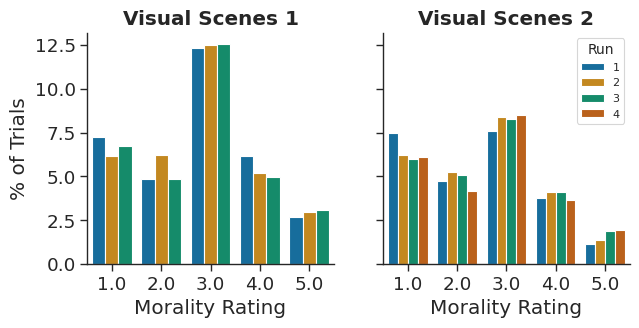

In [23]:
f, ax = plt.subplots(1,2, figsize=(7, 3), sharey=True)

sns.countplot(x='moral_decision', hue='run', data=vis1_beh, palette="colorblind", ax=ax[0], stat='percent')
sns.countplot(x='moral_decision', hue='run', data=vis2_beh, palette="colorblind", ax=ax[1], stat='percent')


sns.despine()

ax[0].set_title("Visual Scenes 1", weight='bold')
ax[1].set_title("Visual Scenes 2", weight='bold')

ax[0].set(ylabel="% of Trials")
ax[0].set(xlabel="Morality Rating")
ax[1].set(xlabel="Morality Rating")
ax[0].legend_.remove()
ax[1].legend(loc='upper right', ncol=1, title='Run', fontsize=8, title_fontsize=10)
plt.savefig('/srv/lab/fmri/mft/fhopp_diss/analysis/signature/plots/smid_ratings_runs.png', dpi=300, bbox_inches='tight')
plt.show()


### Ratings across images

/tmp/ipykernel_364694/234394285.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("seismic")
/tmp/ipykernel_364694/234394285.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=vis1_beh,


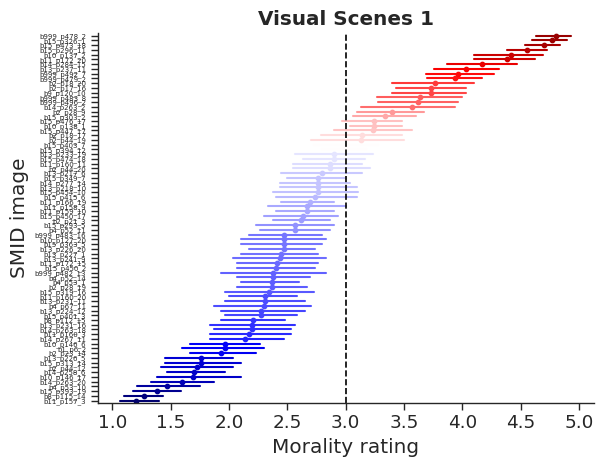

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the ordering of the stimuli
ordered_stims = vis1_beh.groupby('stim_file')['moral_decision'].mean().sort_values(ascending=False)

# Normalize moral_decision values to a colormap with midpoint at 3.0
norm = mcolors.TwoSlopeNorm(vmin=vis1_beh['moral_decision'].min(),
                            vcenter=3.0,
                            vmax=vis1_beh['moral_decision'].max())
cmap = plt.cm.get_cmap("seismic")

# Map each mean value to a color
colors = [cmap(norm(val)) for val in ordered_stims.values]

# Plot with those colors
sns.pointplot(data=vis1_beh,
              y="stim_file",
              x="moral_decision",
              order=ordered_stims.index,
              palette=colors,
              linestyle="none", **{'markersize': 3, 'linewidth': 1.5})

sns.despine()

# Add vertical line at 3.0
plt.axvline(x=3.0, color='black', linestyle='--')

# Set y-tick labels
plt.yticks(ticks=range(0, len(ordered_stims)),
           labels=ordered_stims.index,
           fontsize=5)


plt.ylabel('SMID image')
plt.xlabel('Morality rating')
plt.title('Visual Scenes 1', weight='bold')
plt.savefig('/srv/lab/fmri/mft/fhopp_diss/analysis/signature/plots/smid_vis1.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_364694/2657733768.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("seismic")
/tmp/ipykernel_364694/2657733768.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=vis2_beh,


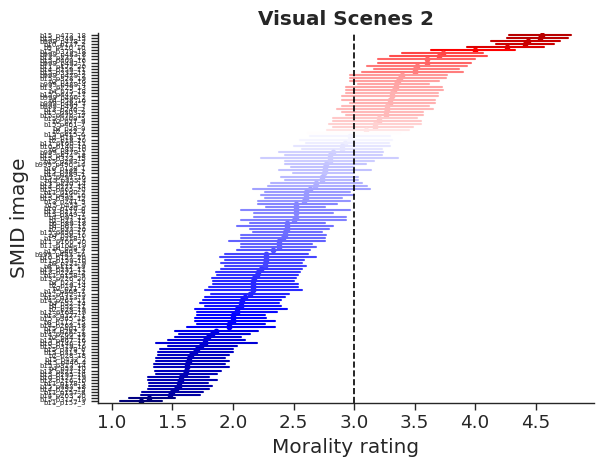

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the ordering of the stimuli
ordered_stims = vis2_beh.groupby('stim_file')['moral_decision'].mean().sort_values(ascending=False)

# Normalize moral_decision values to a colormap with midpoint at 3.0
norm = mcolors.TwoSlopeNorm(vmin=vis2_beh['moral_decision'].min(),
                            vcenter=3.0,
                            vmax=vis2_beh['moral_decision'].max())
cmap = plt.cm.get_cmap("seismic")

# Map each mean value to a color
colors = [cmap(norm(val)) for val in ordered_stims.values]

# Plot with those colors
sns.pointplot(data=vis2_beh,
              y="stim_file",
              x="moral_decision",
              order=ordered_stims.index,
              palette=colors,
              linestyle="none", **{'markersize': 3, 'linewidth': 1.5})

sns.despine()

# Add vertical line at 3.0
plt.axvline(x=3.0, color='black', linestyle='--')

# Set y-tick labels
plt.yticks(ticks=range(0, len(ordered_stims)),
           labels=ordered_stims.index,
           fontsize=5)


plt.ylabel('SMID image')
plt.xlabel('Morality rating')
plt.title('Visual Scenes 2', weight='bold')
plt.savefig('/srv/lab/fmri/mft/fhopp_diss/analysis/signature/plots/smid_vis2.png', dpi=300, bbox_inches='tight')
plt.show()

### Distribution of ratings across participants

In [26]:
# Did every participant make use of all 4 rating options across all vignettes?
mj_range_vis1 = vis1_beh.groupby("sub_id")['moral_decision'].unique().apply(lambda x: max(x)-min(x))
mj_range_vis1.describe()

count    30.000000
mean      3.966667
std       0.182574
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: moral_decision, dtype: float64

In [27]:
mj_range_vis1.value_counts()

moral_decision
4.0    29
3.0     1
Name: count, dtype: int64

In [28]:
mj_range_vis1.sort_values(ascending=True).head(4)

sub_id
sub-10    3.0
sub-02    4.0
sub-31    4.0
sub-30    4.0
Name: moral_decision, dtype: float64

In [29]:
vis1_beh[vis1_beh['sub_id']=='sub-10']['moral_decision'].unique()

array([1., 3., 2., 4.])

In [30]:
# Did every participant make use of all 4 rating options across all vignettes?
mj_range_vis2 = vis2_beh.groupby("sub_id")['moral_decision'].unique().apply(lambda x: max(x)-min(x))
mj_range_vis2.describe()

count    30.000000
mean      3.900000
std       0.305129
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: moral_decision, dtype: float64

In [31]:
mj_range_vis2.value_counts()

moral_decision
4.0    27
3.0     3
Name: count, dtype: int64

In [32]:
mj_range_vis2.sort_values(ascending=True).head(4)

sub_id
sub-28    3.0
sub-05    3.0
sub-11    3.0
sub-02    4.0
Name: moral_decision, dtype: float64

In [33]:
vis2_beh[vis2_beh['sub_id']=='sub-28']['moral_decision'].unique()

array([2., 3., 1., 4.])

In [34]:
vis2_beh[vis2_beh['sub_id']=='sub-05']['moral_decision'].unique()

array([3., 5., 2., 4.])

In [35]:
vis2_beh[vis2_beh['sub_id']=='sub-11']['moral_decision'].unique()

array([1., 2., 4., 3.])

***